## 6. Classification of Apps as 'Editor's Choice'

### Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset (replace 'dataset.csv' with your file path)
df = pd.read_csv('Google-Playstore-Preprocessed.csv')

# Display dataset overview
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248021 entries, 0 to 1248020
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1248021 non-null  int64  
 1   App Name          1248021 non-null  object 
 2   App Id            1248021 non-null  object 
 3   Category          1248021 non-null  object 
 4   Rating            1248021 non-null  float64
 5   Rating Count      1248021 non-null  float64
 6   Minimum Installs  1248021 non-null  float64
 7   Maximum Installs  1248021 non-null  int64  
 8   Free              1248021 non-null  bool   
 9   Price             1248021 non-null  float64
 10  Currency          1248021 non-null  object 
 11  Size              1248021 non-null  float64
 12  Minimum Android   1248021 non-null  object 
 13  Released          1248021 non-null  object 
 14  Last Updated      1248021 non-null  object 
 15  Content Rating    1248021 non-n

### Step 2: Data Preprocessing

In [3]:
# Encode Categorical Features and Handle Missing Values

# Encode categorical features
label_encoders = {}
categorical_columns = ['Category']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Handle missing values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Replace missing ratings with mean
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)  # Convert and fill missing prices
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').fillna(df['Size'].mean())  # Convert and fill missing sizes

# Convert 'Editor's Choice' to binary (1 for True, 0 for False)
df['Editors Choice'] = df['Editors Choice'].astype(int)

# Select features and target variable
features = ['Rating', 'Category', 'Price', 'Size', 'Minimum Installs', 'Maximum Installs']
target = 'Editors Choice'

X = df[features]
y = df[target]


### Step 3: Split Data into Train and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Train the Decision Tree Classifier

In [5]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    249468
           1       0.43      0.02      0.04       137

    accuracy                           1.00    249605
   macro avg       0.71      0.51      0.52    249605
weighted avg       1.00      1.00      1.00    249605

Accuracy Score: 0.9994471264598065


### Step 5: Visualize the Decision Tree

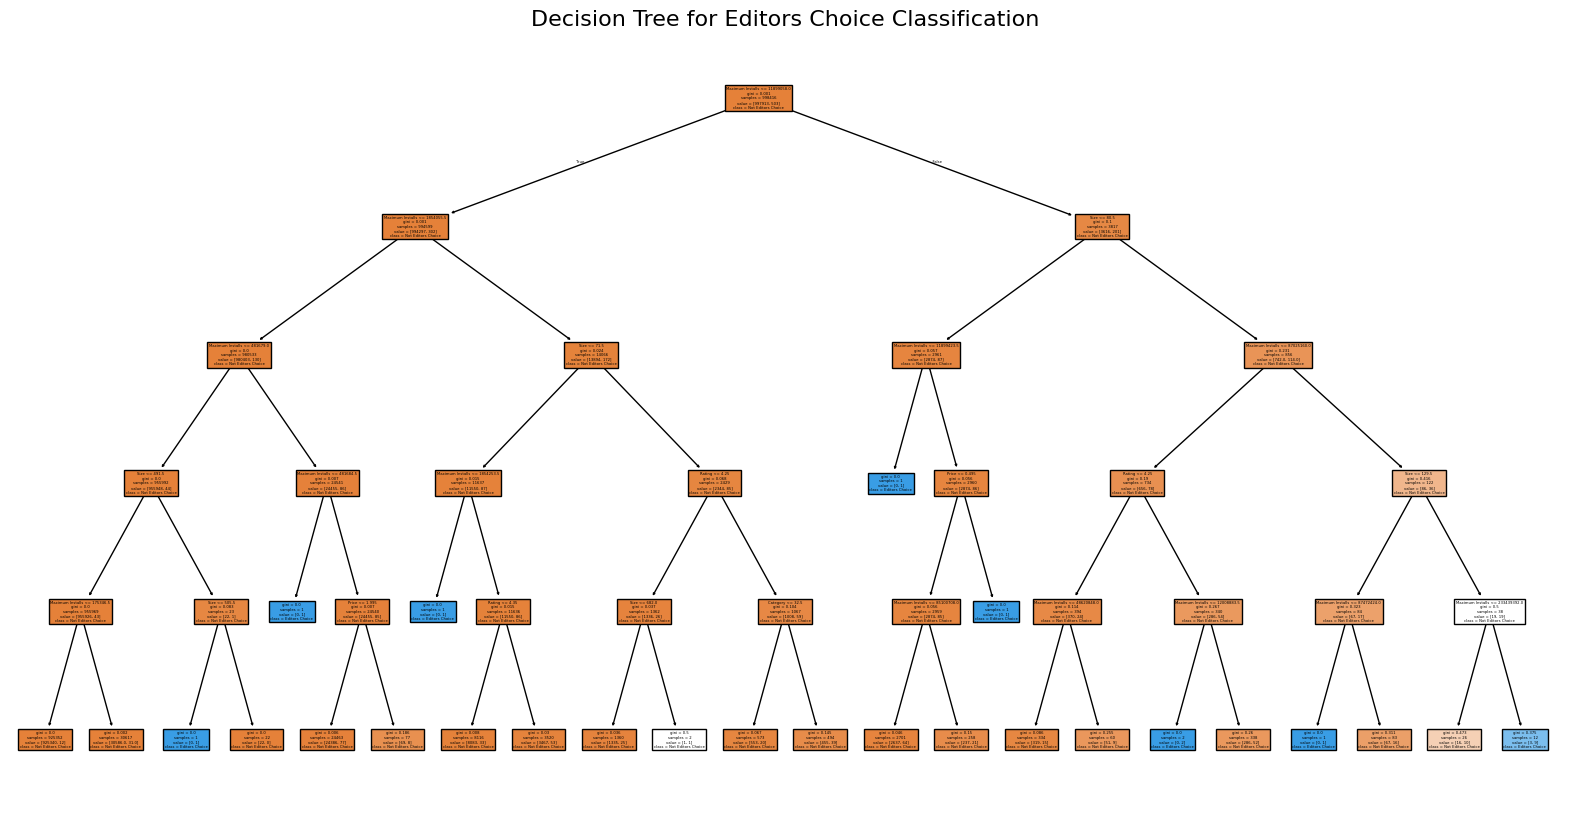

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['Not Editors Choice', 'Editors Choice'], filled=True)
plt.title('Decision Tree for Editors Choice Classification', fontsize=16)
plt.show()


### Step 6: Feedback Loop with User Interaction

In [7]:
# Use Feature Importance to Refine Dataset

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Feedback options
print("\nFeedback Options:")
print("1. Drop less important features (Importance < 0.1).")
print("2. Re-train the model with top features only.")
print("3. Add new engineered features (e.g., Price per Install).")
print("4. Proceed without changes.")

# User input
choice = int(input("Enter your choice (1, 2, 3, or 4): "))

if choice == 1:
    # Drop less important features
    important_features = feature_importance[feature_importance['Importance'] >= 0.1]['Feature']
    X = df[important_features]
    print(f"Retained Features: {list(important_features)}")
elif choice == 2:
    # Re-train with top features
    top_features = feature_importance.head(3)['Feature']
    X = df[top_features]
    print(f"Using Top Features: {list(top_features)}")
elif choice == 3:
    # Add new feature
    df['Price per Install'] = df['Price'] / df['Maximum Installs']
    df['Price per Install'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division by zero
    X['Price per Install'] = df['Price per Install']
    print("Added 'Price per Install' feature.")
elif choice == 4:
    print("Proceeding without changes.")
else:
    print("Invalid choice. Proceeding without changes.")


Feature Importance:
             Feature  Importance
5  Maximum Installs    0.577241
3              Size    0.300512
0            Rating    0.068285
2             Price    0.041548
1          Category    0.012415
4  Minimum Installs    0.000000

Feedback Options:
1. Drop less important features (Importance < 0.1).
2. Re-train the model with top features only.
3. Add new engineered features (e.g., Price per Install).
4. Proceed without changes.
Retained Features: ['Maximum Installs', 'Size']


### Step 7: Re-train Model and Evaluate

Updated Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    249468
           1       0.50      0.01      0.03       137

    accuracy                           1.00    249605
   macro avg       0.75      0.51      0.51    249605
weighted avg       1.00      1.00      1.00    249605

Updated Accuracy Score: 0.9994511327898079


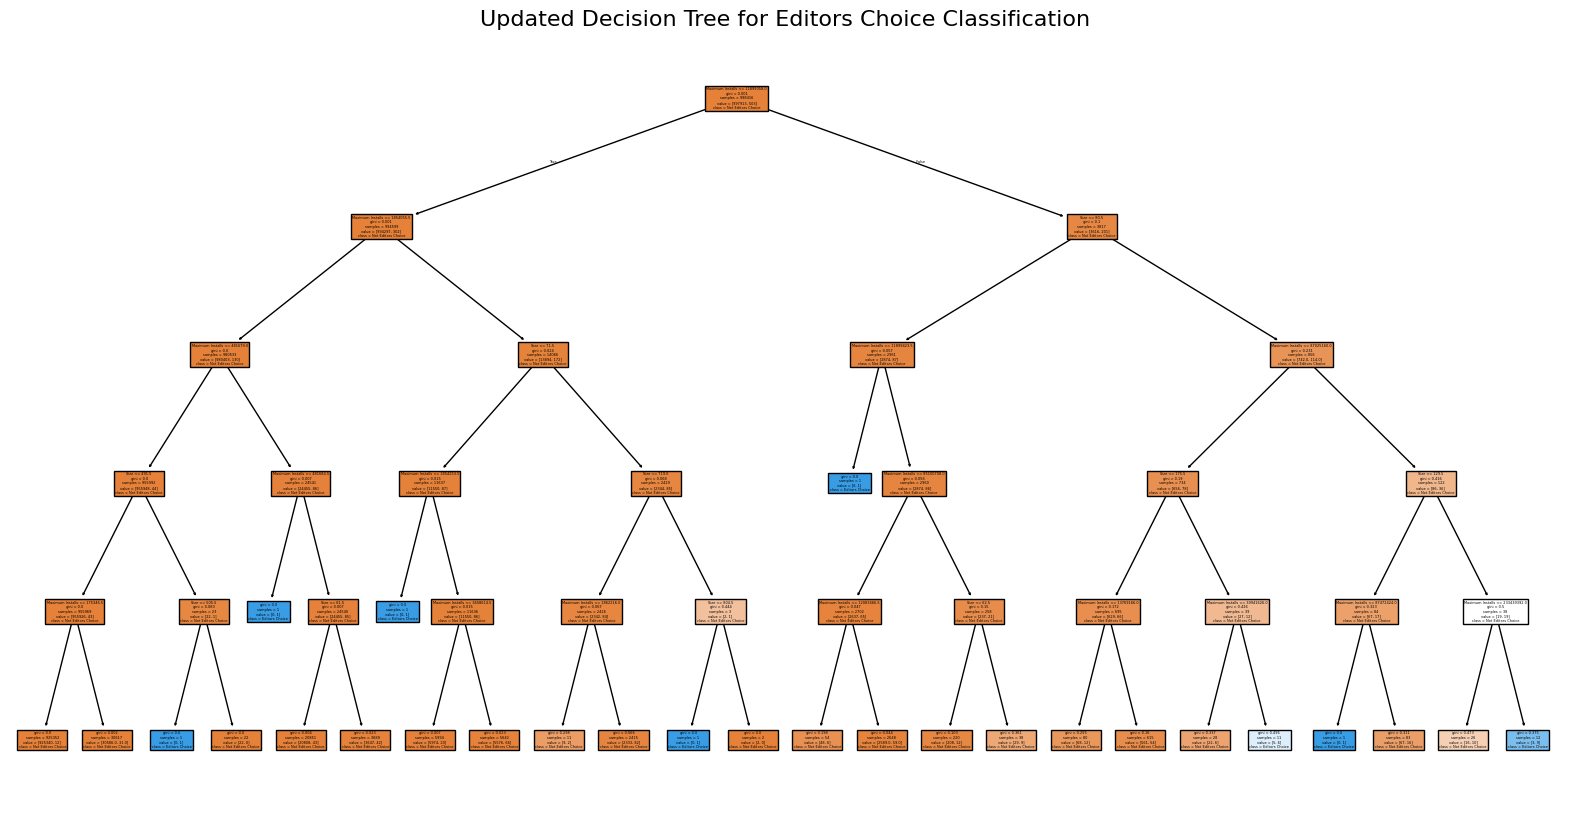

In [8]:
# Re-split data based on updated features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Re-predict and evaluate
y_pred = clf.predict(X_test)
print("Updated Classification Report:\n", classification_report(y_test, y_pred))
print("Updated Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualize the updated decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Editors Choice', 'Editors Choice'], filled=True)
plt.title('Updated Decision Tree for Editors Choice Classification', fontsize=16)
plt.show()
